## ScraPing.py

Plots server-to-server latency as a function of user-defined intervals.

The data collection relies on the Unix command `ping` which sends and receives a packet over the internet and records attributes of its transfer. The command also accepts arguments that can change the amount of packets sent or the interval in between packet transfer.

Output is displayed on the command line as follows:

```shell
$ ping google.com
PING google.com (172.253.122.113) 56(84) bytes of data.
64 bytes from 172.253.122.113: icmp_seq=1 ttl=36 time=20.9 ms
64 bytes from 172.253.122.113: icmp_seq=2 ttl=36 time=23.9 ms
64 bytes from 172.253.122.113: icmp_seq=3 ttl=36 time=20.9 ms
64 bytes from 172.253.122.113: icmp_seq=4 ttl=36 time=20.3 ms
64 bytes from 172.253.122.113: icmp_seq=5 ttl=36 time=22.3 ms
```

Using output redirection, we can pass this information to a file:

```shell
$ ping -n 12 google.com > ping_12_times.txt
```

The data from such a file can be scraped using `re`, a regex evaluation module for Python.

### Implementation

The following code describes the function `buildit()` which parses a file containing ping information and aggregates the time and sequence parameters into a dataframe line-by-line.

Next, data files are passed into `buildit()` using `glob()` onto the directory containing the datasets. Then, the dataframe is plotted onto a properly formatted axis object.

In [1]:
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt

def buildit(fname):
    f = open(str(fname), "r")
    u = 1
    df = pd.DataFrame(columns=['num', 'ms'])
    df.loc[0] = [0] + [0]
    for s in f:
        if(re.match(r'.*Unreachable.*', s)):
                df.loc[u] = [-10] + [-10]
        else:
            n = re.match(r'.*seq=([0-9]*).*', s)
            m = re.match(r'.*time=([0-9]*).*', s)
            if m and n:
                df.loc[u] = [n.group(1)] + [m.group(1)]
            u += 1
    f.close()
    return df

### Real-world example

Since I live in a rural area, my home uses an extended-network setup which resolves internet from a satellite connected to AT&T. Since quarantine has forced everyone inside, we've had 10+ devices connected to our router at a time; this excessive bandwith usage has led to slowdowns and latency-spikes.

Thankfully, our ISP was able to come out and replace our satellite with one that picks up internet from a local internet broadcast tower. The impact of this transition is best described below, using the following two datasets which collate the results of `ping -n 18 google.com` from before (set1.txt) and after (set2.txt) they installed the new device.

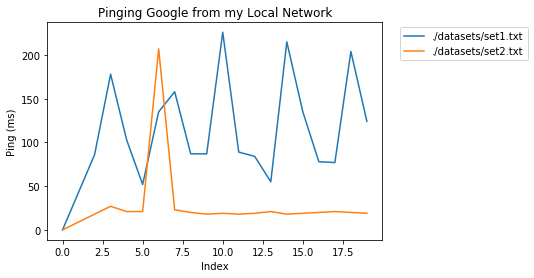

In [2]:
fig, ax = plt.subplots()
datasets = glob.glob('./datasets/*.txt')

for x in datasets:
    df = buildit(x)
    df['ms'].astype(float).plot(ax=ax, label=x)
    
ax.set_title("Pinging Google from my Local Network")
ax.set_xlabel("Index")
ax.set_ylabel("Ping (ms)")
ax.legend(bbox_to_anchor=(1.45,1))

The graph shows a demonstrable difference in internet quality from before and after installing the new satellite. We can see this qualitatively: the flattened impact of latency-spikes indicates the stability of the connection; and the smaller y-values correspond to a faster internet connection.

### Notes

This code was run on a Unix machine over WiFi. The datasets compose of 18 packet-transfers, each pausing for 5-second intervals, from my local network to google.com.